In [1]:
import os, cv2
import numpy as np
import tensorflow as tf
from tensorflow.python import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, AvgPool2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Programming\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data_dir = './flowers/'
img_width = 150
img_height = 150

images = []
flower_types = []
for flower_type in ["rose","sunflower"]:
    flower_dir = data_dir + flower_type
    flower_files = [flower_dir + '/' + filename for filename in os.listdir(flower_dir)]
    for filename in flower_files:
        if filename.endswith('jpg'):
            images.append(cv2.resize(cv2.imread(filename), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
            flower_types.append(flower_type)
            
images = np.array(images)
flower_types = np.array(flower_types)

le = LabelEncoder()
flower_types_encoded = le.fit_transform(flower_types)
flower_types_encoded_onehot = np_utils.to_categorical(flower_types_encoded)

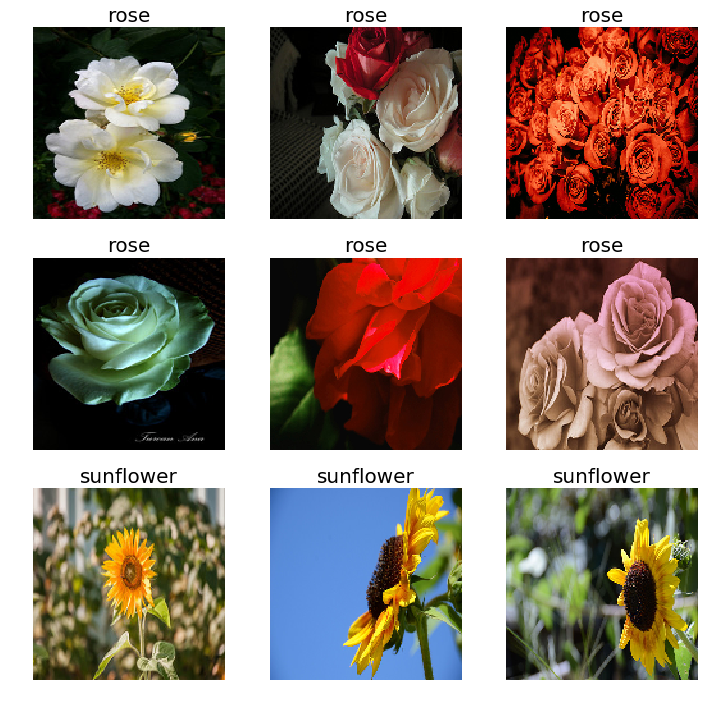

In [3]:
_, ax = plt.subplots(3,3, figsize=(12,12))
for i in range(3):
    for j in range(3):
      ax[i,j].imshow(cv2.cvtColor(images[(i*500)+j], cv2.COLOR_BGR2RGB))
      ax[i,j].axis('off')
      ax[i,j].set_title(le.inverse_transform(flower_types_encoded[(i*500)+j]), size = 20)

In [118]:
images, flower_types, flower_types_encoded = shuffle(images, flower_types, flower_types_encoded)
flower_types_encoded.resize((images.shape[0],1))

In [112]:
model = Sequential()

model.add(Conv2D(32, (3, 3),
                       input_shape=(150, 150, 3),
                       strides = (1,1), 
                       padding = 'same',
                       kernel_initializer='he_normal',
                       activation='relu'))
model.add(BatchNormalization())
model.add(AvgPool2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3),
                       input_shape=(150, 150, 3),
                       strides = (1,1), 
                       padding = 'same',
                       activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3),
                       input_shape=(150, 150, 3),
                       strides = (1,1), 
                       padding = 'same',
                       activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3),
                       input_shape=(150, 150, 3),
                       strides = (1,1), 
                       padding = 'same',
                       activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='normal'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
average_pooling2d_3 (Average (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 18, 18, 32)        0         
__________

In [114]:
images_train, images_val, flower_types_encoded_train, flower_types_encoded_val = train_test_split(images, flower_types_encoded, test_size=0.2, random_state=0)

fitted_model = model.fit(images_train, flower_types_encoded_train,
          batch_size=1,
          epochs=5,
          validation_data=(images_val, flower_types_encoded_val ))

Train on 1214 samples, validate on 304 samples
Epoch 1/5
1214/1214 [==============================] - 77s 63ms/step - loss: 0.4988 - acc: 0.7586 - val_loss: 0.2921 - val_acc: 0.8914
Epoch 2/5
1214/1214 [==============================] - 77s 64ms/step - loss: 0.2878 - acc: 0.8871 - val_loss: 0.2374 - val_acc: 0.9342
Epoch 3/5
1214/1214 [==============================] - 77s 63ms/step - loss: 0.2063 - acc: 0.9259 - val_loss: 0.2164 - val_acc: 0.9211
Epoch 4/5
1214/1214 [==============================] - 77s 63ms/step - loss: 0.1740 - acc: 0.9242 - val_loss: 0.2539 - val_acc: 0.9046
Epoch 5/5
1214/1214 [==============================] - 77s 64ms/step - loss: 0.1306 - acc: 0.9423 - val_loss: 0.3111 - val_acc: 0.9243


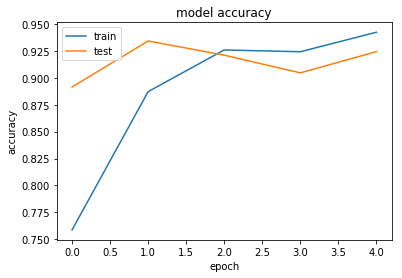

In [115]:
plt.plot(fitted_model.history['acc'])
plt.plot(fitted_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

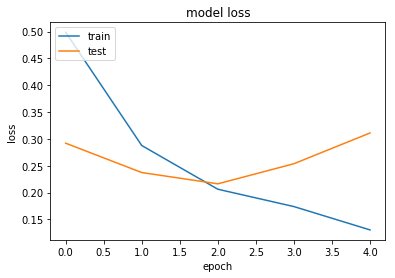

In [116]:
plt.figure()
plt.gcf().clear()
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()